Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [58]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [40]:
# Mnist Dataset Load
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [41]:
# Check X_train length
X_train.shape

(60000, 28, 28)

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
len(X_train)

60000

In [44]:
#Digits Image size is : 
X_train[0].shape

(28, 28)

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

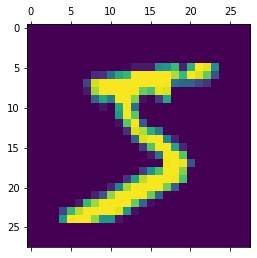

In [46]:
plt.matshow(X_train[0])

In [47]:
X_train=X_train/255
X_test=X_test/255

In [48]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
X_train_flattent=X_train.reshape(len(X_train),28*28)
X_test_flattent=X_test.reshape(len(X_test),28*28)


In [55]:
X_test_flattent[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

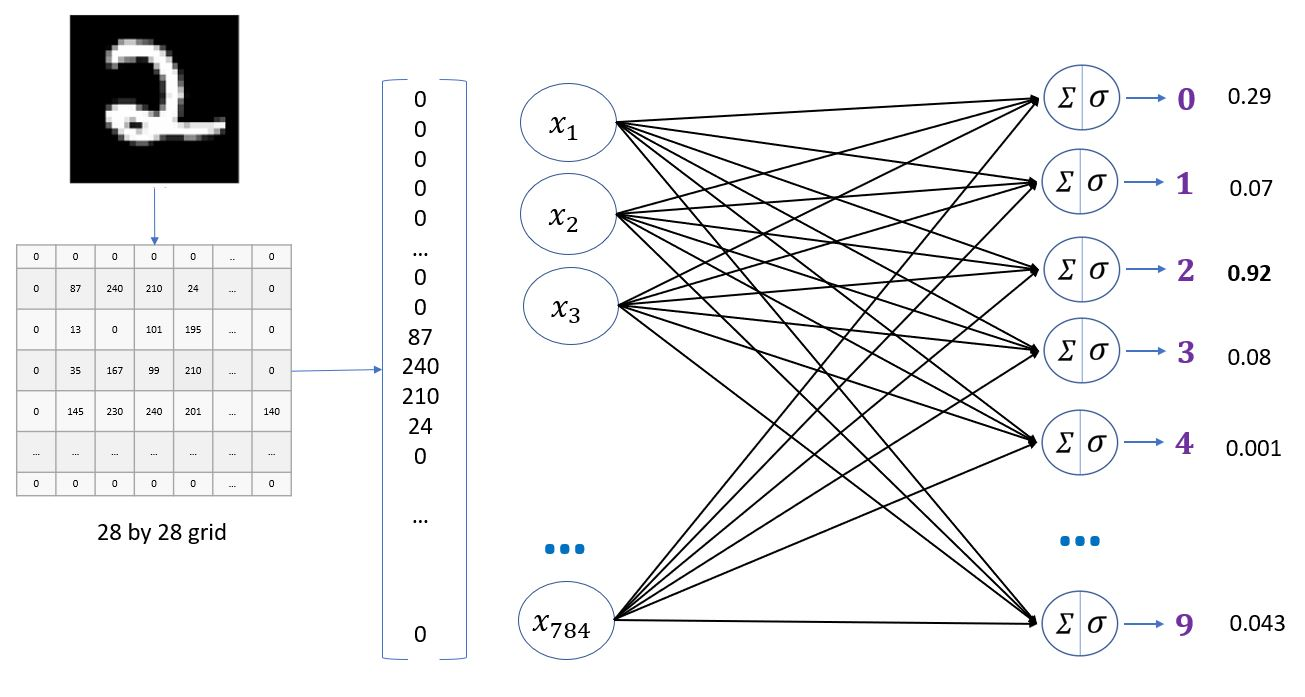

In [59]:
from IPython.display import Image
Image("/content/drive/MyDrive/Deep_leearning/1_hand_writte_digits_classifier/digits_nn.jpg")

In [61]:
# Mosel Create 

model=keras.Sequential(
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattent,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9251


In [63]:
#performance Check

model.evaluate(X_test_flattent,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2699 - accuracy: 0.9255


[0.26993176341056824, 0.9254999756813049]

In [65]:
# Prediction 
y_predict=model.predict(X_test_flattent)

In [66]:
y_predict[0]

array([1.5203983e-02, 3.3565735e-07, 6.3117653e-02, 9.3870091e-01,
       1.9995272e-03, 1.0382712e-01, 1.7755137e-06, 9.9979210e-01,
       1.0702610e-01, 6.3648838e-01], dtype=float32)

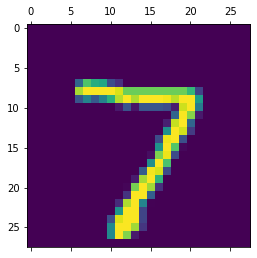

In [67]:
plt.matshow(X_test[0])

In [70]:
#np.argmax finds a maximum element from an array and returns the index of it

np.argmax(y_predict[0])

7

In [71]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [73]:
# Create Confusion_metrics
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    5,   10,    3,    4,    0],
       [   0, 1109,    2,    2,    0,    1,    4,    2,   15,    0],
       [   4,   12,  906,   21,   10,    4,   13,   10,   49,    3],
       [   0,    0,   14,  916,    1,   26,    3,   10,   32,    8],
       [   1,    1,    2,    1,  919,    0,   12,    4,   10,   32],
       [   6,    3,    1,   28,   10,  775,   17,    5,   39,    8],
       [   7,    3,    5,    1,    7,   10,  919,    2,    4,    0],
       [   1,    6,   21,    6,    9,    1,    0,  945,    6,   33],
       [   4,    6,    4,   17,    9,   16,    8,   10,  895,    5],
       [   9,    7,    1,    8,   32,    5,    0,   19,   13,  915]],
      dtype=int32)>

Text(69.0, 0.5, 'True Value')

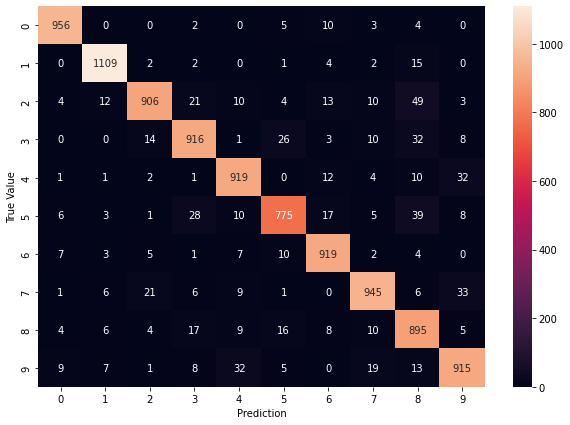

In [77]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("True Value")

Using hidden **layer**

In [87]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattent, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9841


In [89]:
# Check Using Hidden Layders Performance
model.evaluate(X_test_flattent,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9769


[0.07528666406869888, 0.9768999814987183]

Text(69.0, 0.5, 'Trues')

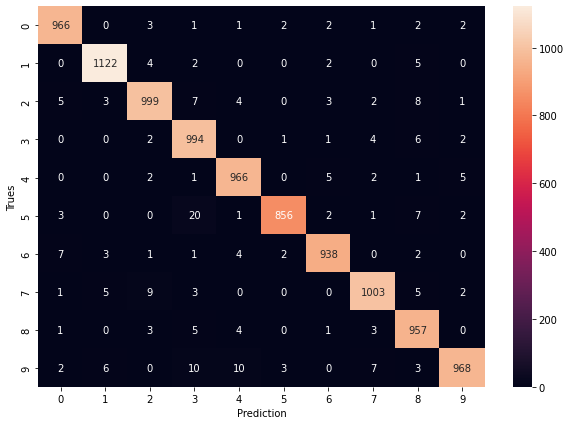

In [90]:
y_predict=model.predict(X_test_flattent)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Trues')


Using Flatten layer so that we don't have to call .reshape on input dataset

In [96]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2673 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9843


In [97]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9774


[0.07335042953491211, 0.977400004863739]

Text(69.0, 0.5, 'True')

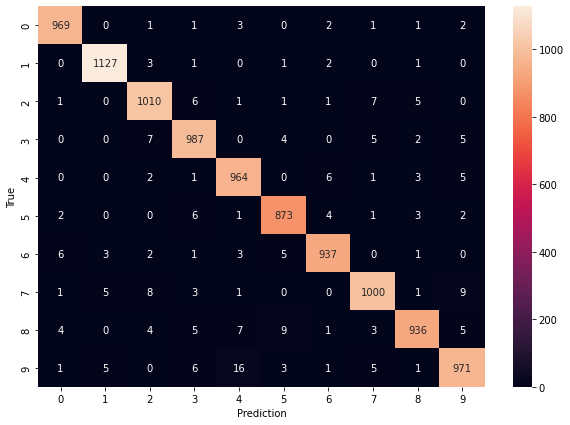

In [101]:
yPredict=model.predict(X_test)
ylabels=[np.argmax(i) for i in yPredict ]
cm=tf.math.confusion_matrix(labels=y_test,predictions=ylabels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel('True')